# Affine transformation of the pixel grid

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
I = scipy.misc.face().mean(axis=2)[::-1]

In [7]:
from scipy.interpolate import interpn

In [83]:
# Define a box area
x, y, w, h = 480, 370, 320, 150
box = np.array([[x, x+w, x+w, x, x],
                [y, y, y+h, y+h, y]]).T

In [87]:
# Define an affine transformation
# translation + A

def affine(xy, A):
    dxy = xy - xy[0, :]

    xy_prime = np.einsum('ij, ik', A[:, 1:], dxy.T).T
    xy_prime += xy[0, :] + A[:, 0]
    return xy_prime

In [89]:
A = np.array([[10, 1.3, 0.41], [-20, -0.41, 1]])

box_prime = affine(box, A)

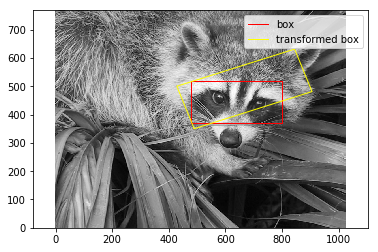

In [91]:
plt.pcolormesh(I, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1, label='box');
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow',
         linewidth=1, label='transformed box');
plt.axis('equal'); plt.legend();

In [56]:
# Map pixel of the box to box_prime

In [93]:
# List pixels coords of the box
x_grid, y_grid = np.meshgrid(np.arange(x, x+w), np.arange(y, y+h))
xy_grid = np.vstack([x_grid.flatten(), y_grid.flatten()]).T

In [94]:
# Transform the coords
xy_prime = affine(xy_grid, A)

In [96]:
# Interpolate the image on the transformed pixel
x_span, y_span = np.arange(I.shape[0]), np.arange(I.shape[1])
f = interpn((y_span, x_span), I.T, xy_prime, method='splinef2d')
I_prime = f.reshape(x_grid.shape)

x_prime_grid = xy_prime[:, 0].reshape(x_grid.shape)
y_prime_grid = xy_prime[:, 1].reshape(x_grid.shape)

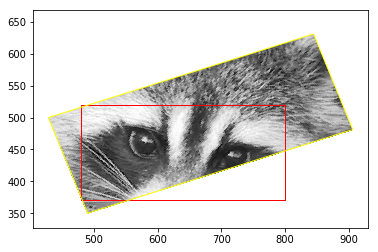

In [97]:
# Graph
plt.pcolormesh(x_prime_grid, y_prime_grid, I_prime, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1);
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow', linewidth=1);
plt.axis('equal');

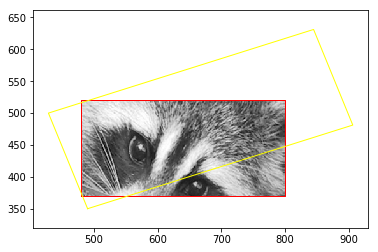

In [99]:
# Graph2: Deformed box projected back on the original box
plt.pcolormesh(x_grid, y_grid, I_prime, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1);
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow', linewidth=1);
plt.axis('equal');